# **Load the Data**

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/smiles_for_fingerprint.tsv', sep='\t')

In [ ]:
df.head()

,Molecule ChEMBL ID,Smiles,Bit vector_0,Bit vector_1,Bit vector_2,Bit vector_3,Bit vector_4,Bit vector_5,Bit vector_6,Bit vector_7,...,Bit vector_2039,Bit vector_2040,Bit vector_2041,Bit vector_2042,Bit vector_2043,Bit vector_2044,Bit vector_2045,Bit vector_2046,Bit vector_2047,Label
0,CHEMBL121,CN(CCOc1ccc(CC2SC(=O)NC2=O)cc1)c1ccccn1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,CHEMBL595,CCc1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,CHEMBL59132,Cc1oc(-c2ccccc2)nc1CCOc1ccc(CC2SC(=O)NC2=O)cc1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,CHEMBL4127972,O=C1NC(=O)C(Cc2ccc(OCCOC(c3ccccc3)c3ccccc3)cc2)S1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,CHEMBL4293295,CCc1ccc([C@H](O)COc2ccc(CC3SC(=O)NC3=O)cc2)nc1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4285 entries, 0 to 4284
Columns: 2051 entries, Molecule ChEMBL ID to Label
dtypes: int64(2049), object(2)
memory usage: 67.1+ MB


In [ ]:
df.shape

(4285, 2051)

# **Drop Chembl id and Smiles**

In [ ]:
# Drop the columns
df = df.drop(columns= ['Molecule ChEMBL ID' , 'Smiles'])

# View first 5 rows to confirm
df.head()

,Bit vector_0,Bit vector_1,Bit vector_2,Bit vector_3,Bit vector_4,Bit vector_5,Bit vector_6,Bit vector_7,Bit vector_8,Bit vector_9,...,Bit vector_2039,Bit vector_2040,Bit vector_2041,Bit vector_2042,Bit vector_2043,Bit vector_2044,Bit vector_2045,Bit vector_2046,Bit vector_2047,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# **Data splitting as X and y**

In [ ]:
# Features (all columns except the target 'Label')
X = df.drop(columns=['Label'])

# Target
y = df['Label']

# Check shapes
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (4285, 2048)
y shape: (4285,)


# **Data Split - 60 & 40**

In [ ]:
from sklearn.model_selection import train_test_split

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)


In [ ]:
X_train.shape

(2571, 2048)

In [ ]:
X_test.shape

(1714, 2048)

#**Model Building**

## **Random Forest**

### **Import the model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier




### **Define the model**

In [ ]:
# Define RF with class_weight='balanced' for imbalanced dataset
rf = RandomForestClassifier(random_state=42, class_weight='balanced_subsample')


### **Training the model**

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', random_state=42)

### **Applying the model to make Prediction**

In [ ]:
# Predict on training and test data
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)
#for predict probablities(auc roc score)
y_rf_train_prob = rf.predict_proba(X_train)[:, 1]   # positive class probability
y_rf_test_prob = rf.predict_proba(X_test)[:, 1]



### **Evaluation Metrics - f1, Precision, Recall**

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score


rf_train_f1 = f1_score(y_train, y_rf_train_pred)
rf_test_f1 = f1_score(y_test, y_rf_test_pred)
rf_train_precision = precision_score(y_train, y_rf_train_pred)
rf_test_precision = precision_score(y_test, y_rf_test_pred)
rf_train_recall = recall_score(y_train, y_rf_train_pred)
rf_test_recall = recall_score(y_test, y_rf_test_pred)
rf_train_accuracy = accuracy_score(y_train, y_rf_train_pred)
rf_test_accuracy = accuracy_score(y_test, y_rf_test_pred)
rf_train_confusion = confusion_matrix(y_train, y_rf_train_pred, normalize='true')
rf_test_confusion = confusion_matrix(y_test, y_rf_test_pred, normalize='true')
rf_train_auc = roc_auc_score(y_train, y_rf_train_prob)
rf_test_auc = roc_auc_score(y_test, y_rf_test_prob)


In [ ]:
print('RF F1 (Train)        : ', rf_train_f1)
print('RF Precision (Train) : ', rf_train_precision)
print('RF Recall (Train)    : ', rf_train_recall)
print('RF F1 (Test)         : ', rf_test_f1)
print('RF Precision (Test)  : ', rf_test_precision)
print('RF Recall (Test)     : ', rf_test_recall)
print('RF Accuracy (Train)  : ', rf_train_accuracy)
print('RF Accuracy (Test)   : ', rf_test_accuracy)
print('RF Confusion (Train) : ', rf_train_confusion)
print('RF Confusion (Test)  : ', rf_test_confusion)
print('RF AUC (Train)       : ', rf_train_auc)
print('RF AUC (Test)        : ', rf_test_auc)


RF F1 (Train)        :  1.0
RF Precision (Train) :  1.0
RF Recall (Train)    :  1.0
RF F1 (Test)         :  0.8888888888888888
RF Precision (Test)  :  0.8888888888888888
RF Recall (Test)     :  0.8888888888888888
RF Accuracy (Train)  :  1.0
RF Accuracy (Test)   :  0.9988331388564761
RF Confusion (Train) :  [[1. 0.]
 [0. 1.]]
RF Confusion (Test)  :  [[9.99413490e-01 5.86510264e-04]
 [1.11111111e-01 8.88888889e-01]]
RF AUC (Train)       :  1.0
RF AUC (Test)        :  0.9995764092538286


### **Final Results**

In [ ]:
rf_metrics_df = pd.DataFrame({
    'Method': ['Random Forest(f)', 'Random Forest(f)'],
    'Dataset': ['Train', 'Test'],
    'Precision': [rf_train_precision, rf_test_precision],
    'Recall': [rf_train_recall, rf_test_recall],
    'F1 Score': [rf_train_f1, rf_test_f1],
    'Accuracy': [rf_train_accuracy, rf_test_accuracy],
    'Confusion Matrix': [rf_train_confusion, rf_test_confusion],
    'AUC': [rf_train_auc, rf_test_auc]
})

rf_metrics_df

,Method,Dataset,Precision,Recall,F1 Score,Accuracy,Confusion Matrix,AUC
0,Random Forest(f),Train,1.000000,1.000000,1.000000,1.000000,"[[1.0, 0.0], [0.0, 1.0]]",1.000000
1,Random Forest(f),Test,0.888889,0.888889,0.888889,0.998833,"[[0.9994134897360704, 0.0005865102639296188], ...",0.999576


In [ ]:
#raw result of confusion matrix
rf_train_confusion_raw = confusion_matrix(y_train, y_rf_train_pred)
rf_test_confusion_raw = confusion_matrix(y_test, y_rf_test_pred)

print('RF Confusion (Train) : ', rf_train_confusion_raw)
print('RF Confusion (Test)  : ', rf_test_confusion_raw)




RF Confusion (Train) :  [[2557    0]
 [   0   14]]
RF Confusion (Test)  :  [[1704    1]
 [   1    8]]


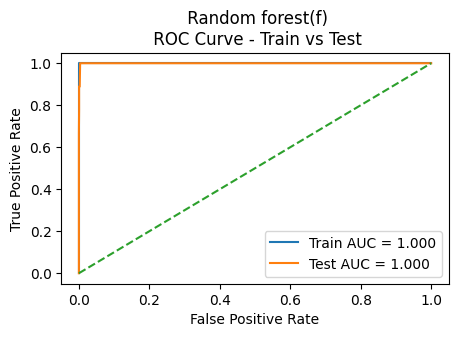

In [ ]:
#plot the roc auc curve
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Train probabilities
y_rf_train_prob = rf.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, y_rf_train_prob)
auc_train = roc_auc_score(y_train, y_rf_train_prob)

# Test probabilities
y_rf_test_prob = rf.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_rf_test_prob)
auc_test = roc_auc_score(y_test, y_rf_test_prob)

# Plot
plt.figure(figsize=(5,3))
plt.plot(fpr_train, tpr_train, label=f"Train AUC = {auc_train:.3f}")
plt.plot(fpr_test, tpr_test, label=f"Test AUC = {auc_test:.3f}")
plt.plot([0,1], [0,1], linestyle="--")


plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(" Random forest(f)\n ROC Curve - Train vs Test")
plt.legend()
plt.show()

###**Hyperparameter Tuning**

In [ ]:
#to see the hyperpara names in random forest
rf._get_param_names()

['bootstrap',
 'ccp_alpha',
 'class_weight',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'max_samples',
 'min_impurity_decrease',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'monotonic_cst',
 'n_estimators',
 'n_jobs',
 'oob_score',
 'random_state',
 'verbose',
 'warm_start']

In [ ]:
#define param grid
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_features": ["sqrt", "log2"],
    "max_depth": [2, 5, 15],
    "min_samples_leaf": [1, 2, 5],
    "min_samples_split": [2,5],
    "bootstrap" : [True, False]
}


In [ ]:
#using the stratified k fold cross validation for imbalanced class

from sklearn.model_selection import StratifiedKFold, GridSearchCV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
#define param grid
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_features": ["sqrt", "log2"],
    "max_depth": [2, 5, 15],
    "min_samples_leaf": [1, 2, 5],
    "min_samples_split": [2,5],
    "bootstrap" : [True, False]
}

#run the grid search and fit on train data with 5 fold
rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=cv,
    scoring='roc_auc', # Changed 'auc_roc' to 'roc_auc'
    n_jobs=-1,
    verbose=2
)

rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 5, 15],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=2)

In [ ]:
#to get the best hyper para combination
rf_grid.best_params_


{'bootstrap': True,
 'max_depth': 15,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:
print(rf_grid.best_score_)

0.9990877772341813


In [ ]:
# Assuming best_rf holds the dictionary of best parameters from rf_grid.best_params_
# The original model `rf` was defined with random_state and class_weight

# Reinitialize the Random Forest model with the best parameters and original settings
best_rf_model = RandomForestClassifier(random_state=42, class_weight='balanced_subsample', **rf_grid.best_params_)

# Fit this new model to the training data
best_rf_model.fit(X_train, y_train)

# Predict on train and test data using the newly fitted model
y_rf_hyper_train_pred = best_rf_model.predict(X_train)
y_rf_hyper_test_pred = best_rf_model.predict(X_test)
# for predict probabilities (auc roc score)
y_rf_hyper_train_prob = best_rf_model.predict_proba(X_train)[:, 1]
y_rf_hyper_test_prob = best_rf_model.predict_proba(X_test)[:, 1]

In [ ]:
rf_hyper_train_f1 = f1_score(y_train, y_rf_hyper_train_pred)
rf_hyper_test_f1 = f1_score(y_test, y_rf_hyper_test_pred)
rf_hyper_train_precision = precision_score(y_train, y_rf_hyper_train_pred)
rf_hyper_test_precision = precision_score(y_test, y_rf_hyper_test_pred)
rf_hyper_train_recall = recall_score(y_train, y_rf_hyper_train_pred)
rf_hyper_test_recall = recall_score(y_test, y_rf_hyper_test_pred)
rf_hyper_train_accuracy = accuracy_score(y_train, y_rf_hyper_train_pred)
rf_hyper_test_accuracy = accuracy_score(y_test, y_rf_hyper_test_pred)
rf_hyper_train_confusion = confusion_matrix(y_train, y_rf_hyper_train_pred, normalize='true')
rf_hyper_test_confusion = confusion_matrix(y_test, y_rf_hyper_test_pred, normalize='true')
rf_hyper_train_auc = roc_auc_score(y_train, y_rf_hyper_train_prob)
rf_hyper_test_auc = roc_auc_score(y_test, y_rf_hyper_test_prob)

In [ ]:
print('RF hyper F1 (Train)        : ', rf_hyper_train_f1)
print('RF hyper Precision (Train) : ', rf_hyper_train_precision)
print('RF hyper Recall (Train)    : ', rf_hyper_train_recall)
print('RF hyper F1 (Test)         : ', rf_hyper_test_f1)
print('RF hyper Precision (Test)  : ', rf_hyper_test_precision)
print('RF hyper Recall (Test)     : ', rf_hyper_test_recall)
print('RF hyper Accuracy (Train)  : ', rf_hyper_train_accuracy)
print('RF hyper Accuracy (Test)   : ', rf_hyper_test_accuracy)
print('RF hyper Confusion (Train) : ', rf_hyper_train_confusion)
print('RF hyper Confusion (Test)  : ', rf_hyper_test_confusion)
print('RF hyper AUC (Train)       : ', rf_hyper_train_auc)
print('RF hyper AUC (Test)        : ', rf_hyper_test_auc)


RF hyper F1 (Train)        :  0.8484848484848485
RF hyper Precision (Train) :  0.7368421052631579
RF hyper Recall (Train)    :  1.0
RF hyper F1 (Test)         :  0.6206896551724138
RF hyper Precision (Test)  :  0.45
RF hyper Recall (Test)     :  1.0
RF hyper Accuracy (Train)  :  0.9980552314274601
RF hyper Accuracy (Test)   :  0.9935822637106184
RF hyper Confusion (Train) :  [[0.99804458 0.00195542]
 [0.         1.        ]]
RF hyper Confusion (Test)  :  [[0.99354839 0.00645161]
 [0.         1.        ]]
RF hyper AUC (Train)       :  1.0
RF hyper AUC (Test)        :  0.9997393287715868


In [ ]:
import pandas as pd
rf_hyperpara_metrics_df = pd.DataFrame({
    'Method': ['Random Forest Hyperpara(f)', 'Random Forest Hyperpara(f)'],
    'Dataset': ['Train', 'Test'],
    'Precision': [rf_hyper_train_precision, rf_hyper_test_precision],
    'Recall': [rf_hyper_train_recall, rf_hyper_test_recall],
    'F1 Score': [rf_hyper_train_f1, rf_hyper_test_f1],
    'Accuracy': [rf_hyper_train_accuracy, rf_hyper_test_accuracy],
    'Confusion Matrix': [rf_hyper_train_confusion, rf_hyper_test_confusion],
    'AUC': [rf_hyper_train_auc, rf_hyper_test_auc]
})

rf_hyperpara_metrics_df

,Method,Dataset,Precision,Recall,F1 Score,Accuracy,Confusion Matrix,AUC
0,Random Forest Hyperpara(f),Train,0.736842,1.0,0.848485,0.998055,"[[0.9980445834962847, 0.0019554165037152915], ...",1.000000
1,Random Forest Hyperpara(f),Test,0.450000,1.0,0.620690,0.993582,"[[0.9935483870967742, 0.0064516129032258064], ...",0.999739


In [ ]:
#raw result of confusion matrix
rf_hyper_train_confusion_raw = confusion_matrix(y_train, y_rf_hyper_train_pred)
rf_hyper_test_confusion_raw = confusion_matrix(y_test, y_rf_hyper_test_pred)

print('RF hyper Confusion (Train) : ', rf_hyper_train_confusion_raw)
print('RF hyper Confusion (Test)  : ', rf_hyper_test_confusion_raw)



RF hyper Confusion (Train) :  [[2552    5]
 [   0   14]]
RF hyper Confusion (Test)  :  [[1694   11]
 [   0    9]]


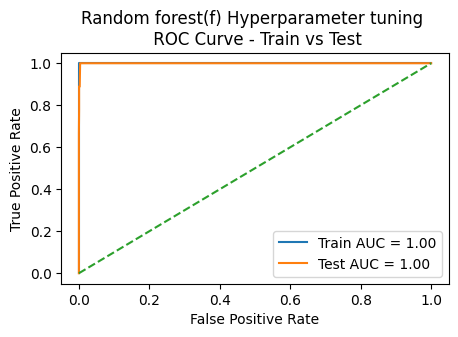

In [ ]:
#plot the roc auc curve
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Train probabilities
y_rf_hyper_train_prob = rf.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, y_rf_hyper_train_prob)
auc_train = roc_auc_score(y_train, y_rf_hyper_train_prob)

# Test probabilities
y_rf_hyper_test_prob = rf.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_rf_hyper_test_prob)
auc_test = roc_auc_score(y_test, y_rf_hyper_test_prob)

# Plot
plt.figure(figsize=(5,3))
plt.plot(fpr_train, tpr_train, label=f"Train AUC = {auc_train:.2f}")
plt.plot(fpr_test, tpr_test, label=f"Test AUC = {auc_test:.2f}")
plt.plot([0,1], [0,1], linestyle="--")


plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random forest(f) Hyperparameter tuning \n ROC Curve - Train vs Test")
plt.legend()
plt.show()

##**Support Vector Machine**

### **Import the Model**

In [ ]:
from sklearn.svm import SVC


###**Define the model**

In [ ]:
svc = SVC(class_weight='balanced', random_state=42, probability=True) #to get auc score svm has to be prob=true it will do internal cv method, in default it is prob=false.

###**Training the model**

In [ ]:
svc.fit(X_train, y_train)

SVC(class_weight='balanced', probability=True, random_state=42)

### **Applying the model to make prediction**

In [ ]:
y_svc_train_pred = svc.predict(X_train)
y_svc_test_pred = svc.predict(X_test)
#for predict probablities(auc roc score)
y_svc_train_prob = svc.predict_proba(X_train)[:, 1]   # positive class probability
y_svc_test_prob = svc.predict_proba(X_test)[:, 1]



###**Evaluation Metrics - f1, Precision, Recall**

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score


svc_train_f1 = f1_score(y_train, y_svc_train_pred)
svc_test_f1 = f1_score(y_test, y_svc_test_pred)
svc_train_precision = precision_score(y_train, y_svc_train_pred)
svc_test_precision = precision_score(y_test, y_svc_test_pred)
svc_train_recall = recall_score(y_train, y_svc_train_pred)
svc_test_recall = recall_score(y_test, y_svc_test_pred)
svc_train_accuracy = accuracy_score(y_train, y_svc_train_pred)
svc_test_accuracy = accuracy_score(y_test, y_svc_test_pred)
svc_train_confusion = confusion_matrix(y_train, y_svc_train_pred, normalize='true')
svc_test_confusion = confusion_matrix(y_test, y_svc_test_pred, normalize='true')
svc_train_auc = roc_auc_score(y_train, y_svc_train_prob)
svc_test_auc = roc_auc_score(y_test, y_svc_test_prob)

In [ ]:
print('SVc F1 (Train)        : ', svc_train_f1)
print('SVc Precision (Train) : ', svc_train_precision)
print('SVc Recall (Train)    : ', svc_train_recall)
print('SVc F1 (Test)         : ', svc_test_f1)
print('SVc Precision (Test)  : ', svc_test_precision)
print('SVc Recall (Test)     : ', svc_test_recall)
print('SVc Accuracy (Train)  : ', svc_train_accuracy)
print('SVc Accuracy (Test)   : ', svc_test_accuracy)
print('SVc Confusion (Train) : ', svc_train_confusion)
print('SVc Confusion (Test)  : ', svc_test_confusion)
print('SVc AUC (Train)       : ', svc_train_auc)
print('SVc AUC (Test)        : ', svc_test_auc)



SVc F1 (Train)        :  0.7567567567567568
SVc Precision (Train) :  0.6086956521739131
SVc Recall (Train)    :  1.0
SVc F1 (Test)         :  0.6206896551724138
SVc Precision (Test)  :  0.45
SVc Recall (Test)     :  1.0
SVc Accuracy (Train)  :  0.9964994165694282
SVc Accuracy (Test)   :  0.9935822637106184
SVc Confusion (Train) :  [[0.99648025 0.00351975]
 [0.         1.        ]]
SVc Confusion (Test)  :  [[0.99354839 0.00645161]
 [0.         1.        ]]
SVc AUC (Train)       :  1.0
SVc AUC (Test)        :  0.9994786575431737


###**Final Results**

In [ ]:
svc_metrics_df = pd.DataFrame({
    'Method': ['Support Vector(f)', 'Support Vector(f)'],
    'Dataset': ['Train', 'Test'],
    'Precision': [svc_train_precision, svc_test_precision],
    'Recall': [svc_train_recall, svc_test_recall],
    'F1 Score': [svc_train_f1, svc_test_f1],
    'Accuracy': [svc_train_accuracy, svc_test_accuracy],
    'Confusion Matrix': [svc_train_confusion, svc_test_confusion],
    'AUC': [svc_train_auc, svc_test_auc]

})

svc_metrics_df

,Method,Dataset,Precision,Recall,F1 Score,Accuracy,Confusion Matrix,AUC
0,Support Vector(f),Train,0.608696,1.0,0.756757,0.996499,"[[0.9964802502933124, 0.0035197497066875244], ...",1.000000
1,Support Vector(f),Test,0.450000,1.0,0.620690,0.993582,"[[0.9935483870967742, 0.0064516129032258064], ...",0.999479


In [ ]:
#raw result of confusion matrix
svc_train_confusion_raw = confusion_matrix(y_train, y_svc_train_pred)
svc_test_confusion_raw = confusion_matrix(y_test, y_svc_test_pred)

print('SVc Confusion (Train) : ', svc_train_confusion_raw)
print('SVc Confusion (Test)  : ', svc_test_confusion_raw)

SVc Confusion (Train) :  [[2548    9]
 [   0   14]]
SVc Confusion (Test)  :  [[1694   11]
 [   0    9]]


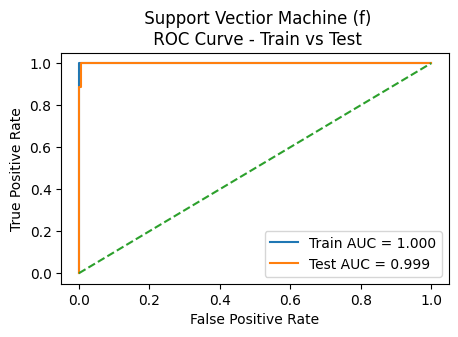

In [ ]:
#plot the roc auc curve
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Train probabilities
y_svc_train_prob = svc.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, y_svc_train_prob)
auc_train = roc_auc_score(y_train, y_svc_train_prob)

# Test probabilities
y_svc_test_prob = svc.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_svc_test_prob)
auc_test = roc_auc_score(y_test, y_svc_test_prob)

# Plot
plt.figure(figsize=(5,3))
plt.plot(fpr_train, tpr_train, label=f"Train AUC = {auc_train:.3f}")
plt.plot(fpr_test, tpr_test, label=f"Test AUC = {auc_test:.3f}")
plt.plot([0,1], [0,1], linestyle="--")


plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(" Support Vectior Machine (f)\n ROC Curve - Train vs Test")
plt.legend()
plt.show()

###**Hyperparameter Tuning**

In [ ]:
#to see the hyperpara names in support vector machine
svc._get_param_names()

['C',
 'break_ties',
 'cache_size',
 'class_weight',
 'coef0',
 'decision_function_shape',
 'degree',
 'gamma',
 'kernel',
 'max_iter',
 'probability',
 'random_state',
 'shrinking',
 'tol',
 'verbose']

In [ ]:
#define param grid
param_grid = {
    'C': [0.1, 1, 10, 50, 100],
    'gamma': ['scale', 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'linear'],
}

In [ ]:
#using the stratified k fold cross validation for imbalanced class

from sklearn.model_selection import StratifiedKFold, GridSearchCV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
#run the grid search and fit on train data with 5 fold
svc_grid = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    cv=cv,
    scoring='roc_auc', # Changed 'auc_roc' to 'roc_auc'
    n_jobs=-1,
    verbose=2
)

svc_grid.fit(X_train, y_train)


Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(class_weight='balanced', probability=True,
                           random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 50, 100],
                         'gamma': ['scale', 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             scoring='roc_auc', verbose=2)

In [ ]:
#to get the best hyper para combination
svc_grid.best_params_

{'C': 50, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
print(svc_grid.best_score_)

0.9990882868558384


In [ ]:
# Assuming best_svc holds the dictionary of best parameters from svc_grid.best_params_
# The original model `svc` was defined with random_state and class_weight

# Reinitialize the Support Vector model with the best parameters and original settings
best_svc_model = SVC(class_weight='balanced', random_state=42, probability=True, **svc_grid.best_params_)

# Fit this new model to the training data
best_svc_model.fit(X_train, y_train)

# Predict on train and test data using the newly fitted model
y_svc_hyper_train_pred = best_svc_model.predict(X_train)
y_svc_hyper_test_pred = best_svc_model.predict(X_test)
# for predict probabilities (auc roc score)
y_svc_hyper_train_prob = best_svc_model.predict_proba(X_train)[:, 1]
y_svc_hyper_test_prob = best_svc_model.predict_proba(X_test)[:, 1]

In [ ]:
svc_hyper_train_f1 = f1_score(y_train, y_svc_hyper_train_pred)
svc_hyper_test_f1 = f1_score(y_test, y_svc_hyper_test_pred)
svc_hyper_train_precision = precision_score(y_train, y_svc_hyper_train_pred)
svc_hyper_test_precision = precision_score(y_test, y_svc_hyper_test_pred)
svc_hyper_train_recall = recall_score(y_train, y_svc_hyper_train_pred)
svc_hyper_test_recall = recall_score(y_test, y_svc_hyper_test_pred)
svc_hyper_train_accuracy = accuracy_score(y_train, y_svc_hyper_train_pred)
svc_hyper_test_accuracy = accuracy_score(y_test, y_svc_hyper_test_pred)
svc_hyper_train_confusion = confusion_matrix(y_train, y_svc_hyper_train_pred, normalize='true')
svc_hyper_test_confusion = confusion_matrix(y_test, y_svc_hyper_test_pred, normalize='true')
svc_hyper_train_auc = roc_auc_score(y_train, y_svc_hyper_train_prob)
svc_hyper_test_auc = roc_auc_score(y_test, y_svc_hyper_test_prob)

In [ ]:
print('SVc hyper F1 (Train)        : ', svc_hyper_train_f1)
print('SVc hyper Precision (Train) : ', svc_hyper_train_precision)
print('SVc hyper Recall (Train)    : ', svc_hyper_train_recall)
print('SVc hyper F1 (Test)         : ', svc_hyper_test_f1)
print('SVc hyper Precision (Test)  : ', svc_hyper_test_precision)
print('SVc hyper Recall (Test)     : ', svc_hyper_test_recall)
print('SVc hyper Accuracy (Train)  : ', svc_hyper_train_accuracy)
print('SVc hyper Accuracy (Test)   : ', svc_hyper_test_accuracy)
print('SVc hyper Confusion (Train) : ', svc_hyper_train_confusion)
print('SVc hyper Confusion (Test)  : ', svc_hyper_test_confusion)
print('SVc hyper AUC (Train)       : ', svc_hyper_train_auc)
print('SVc hyper AUC (Test)        : ', svc_hyper_test_auc)

SVc hyper F1 (Train)        :  1.0
SVc hyper Precision (Train) :  1.0
SVc hyper Recall (Train)    :  1.0
SVc hyper F1 (Test)         :  0.8571428571428571
SVc hyper Precision (Test)  :  0.75
SVc hyper Recall (Test)     :  1.0
SVc hyper Accuracy (Train)  :  1.0
SVc hyper Accuracy (Test)   :  0.9982497082847142
SVc hyper Confusion (Train) :  [[1. 0.]
 [0. 1.]]
SVc hyper Confusion (Test)  :  [[0.99824047 0.00175953]
 [0.         1.        ]]
SVc hyper AUC (Train)       :  1.0
SVc hyper AUC (Test)        :  0.9997393287715868


In [ ]:
import pandas as pd
svc_hyperpara_metrics_df = pd.DataFrame({
    'Method': ['Support Vector Hyperpara(f)', 'Support Vector Hyperpara(f)'],
    'Dataset': ['Train', 'Test'],
    'Precision': [svc_hyper_train_precision, svc_hyper_test_precision],
    'Recall': [svc_hyper_train_recall, svc_hyper_test_recall],
    'F1 Score': [svc_hyper_train_f1, svc_hyper_test_f1],
    'Accuracy': [svc_hyper_train_accuracy, svc_hyper_test_accuracy],
    'Confusion Matrix': [svc_hyper_train_confusion, svc_hyper_test_confusion],
    'AUC': [svc_hyper_train_auc, svc_hyper_test_auc]
})

svc_hyperpara_metrics_df

,Method,Dataset,Precision,Recall,F1 Score,Accuracy,Confusion Matrix,AUC
0,Support Vector Hyperpara(f),Train,1.00,1.0,1.000000,1.00000,"[[1.0, 0.0], [0.0, 1.0]]",1.000000
1,Support Vector Hyperpara(f),Test,0.75,1.0,0.857143,0.99825,"[[0.9982404692082112, 0.0017595307917888563], ...",0.999739


In [ ]:
#raw result of confusion matrix
svc_hyper_train_confusion_raw = confusion_matrix(y_train, y_svc_hyper_train_pred)
svc_hyper_test_confusion_raw = confusion_matrix(y_test, y_svc_hyper_test_pred)

print('SVc hyper Confusion (Train) : ', svc_hyper_train_confusion_raw)
print('SVc hyper Confusion (Test)  : ', svc_hyper_test_confusion_raw)


SVc hyper Confusion (Train) :  [[2557    0]
 [   0   14]]
SVc hyper Confusion (Test)  :  [[1702    3]
 [   0    9]]


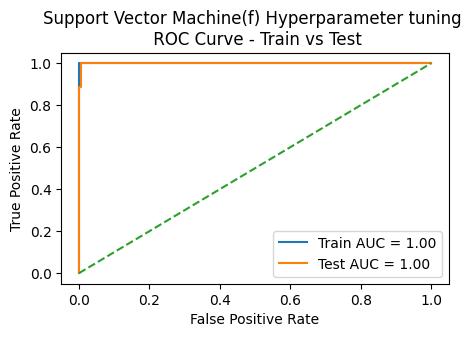

In [ ]:
#plot the roc auc curve
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Train probabilities
y_svc_hyper_train_prob = svc.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, y_svc_hyper_train_prob)
auc_train = roc_auc_score(y_train, y_svc_hyper_train_prob)

# Test probabilities
y_svc_hyper_test_prob = svc.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_svc_hyper_test_prob)
auc_test = roc_auc_score(y_test, y_svc_hyper_test_prob)

# Plot
plt.figure(figsize=(5,3))
plt.plot(fpr_train, tpr_train, label=f"Train AUC = {auc_train:.2f}")
plt.plot(fpr_test, tpr_test, label=f"Test AUC = {auc_test:.2f}")
plt.plot([0,1], [0,1], linestyle="--")


plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Support Vector Machine(f) Hyperparameter tuning \n ROC Curve - Train vs Test")
plt.legend()
plt.show()

## **XGBoost**

###**Import the model**

In [ ]:
from xgboost import XGBClassifier

###**Define the model**

In [ ]:
# Calculate scale_pos_weight
neg = (y_train == 0).sum()
pos = (y_train == 1).sum()
spw = neg / pos
print("scale_pos_weight:", spw)

#Define the model
xgb = XGBClassifier(objective='binary:logistic', eval_metric='logloss', scale_pos_weight=spw, random_state=42)

scale_pos_weight: 182.64285714285714


### **Training the model**

In [ ]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

###**Applying the model to make prediction**

In [ ]:
y_xgb_train_pred = xgb.predict(X_train)
y_xgb_test_pred = xgb.predict(X_test)
#for predict probablities(auc roc score)
y_xgb_train_prob = xgb.predict_proba(X_train)[:, 1]   # positive class probability
y_xgb_test_prob = xgb.predict_proba(X_test)[:, 1]


###**Evaluation Metrics**

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score



xgb_train_f1 = f1_score(y_train, y_xgb_train_pred)
xgb_test_f1 = f1_score(y_test, y_xgb_test_pred)
xgb_train_precision = precision_score(y_train, y_xgb_train_pred)
xgb_test_precision = precision_score(y_test, y_xgb_test_pred)
xgb_train_recall = recall_score(y_train, y_xgb_train_pred)
xgb_test_recall = recall_score(y_test, y_xgb_test_pred)
xgb_train_accuracy = accuracy_score(y_train, y_xgb_train_pred)
xgb_test_accuracy = accuracy_score(y_test, y_xgb_test_pred)
xgb_train_confusion = confusion_matrix(y_train, y_xgb_train_pred, normalize='true')
xgb_test_confusion = confusion_matrix(y_test, y_xgb_test_pred, normalize='true')
xgb_train_auc = roc_auc_score(y_train, y_xgb_train_prob)
xgb_test_auc = roc_auc_score(y_test, y_xgb_test_prob)


In [ ]:
print('XGB F1 (Train)        : ', xgb_train_f1)
print('XGB Precision (Train) : ', xgb_train_precision)
print('XGB Recall (Train)    : ', xgb_train_recall)
print('XGB F1 (Test)         : ', xgb_test_f1)
print('XGB Precision (Test)  : ', xgb_test_precision)
print('XGB Recall (Test)     : ', xgb_test_recall)
print('XGB Accuracy (Train)  : ', xgb_train_accuracy)
print('XGB Accuracy (Test)   : ', xgb_test_accuracy)
print('XGB Confusion (Train) : ', xgb_train_confusion)
print('XGB Confusion (Test)  : ', xgb_test_confusion)
print('XGB AUC (Train)       : ', xgb_train_auc)
print('XGB AUC (Test)        : ', xgb_test_auc)


XGB F1 (Train)        :  0.9333333333333333
XGB Precision (Train) :  0.875
XGB Recall (Train)    :  1.0
XGB F1 (Test)         :  0.75
XGB Precision (Test)  :  0.6
XGB Recall (Test)     :  1.0
XGB Accuracy (Train)  :  0.999222092570984
XGB Accuracy (Test)   :  0.9964994165694282
XGB Confusion (Train) :  [[9.99217833e-01 7.82166601e-04]
 [0.00000000e+00 1.00000000e+00]]
XGB Confusion (Test)  :  [[0.99648094 0.00351906]
 [0.         1.        ]]
XGB AUC (Train)       :  1.0
XGB AUC (Test)        :  0.999543825350277


###**Final Results**

In [ ]:
xgb_metrics_df = pd.DataFrame({
    'Method': ['Extreme Gradient Boosting(f)', 'Extreme Gradient Boosting(f)'],
    'Dataset': ['Train', 'Test'],
    'Precision': [xgb_train_precision, xgb_test_precision],
    'Recall': [xgb_train_recall, xgb_test_recall],
    'F1 Score': [xgb_train_f1, xgb_test_f1],
    'Accuracy': [xgb_train_accuracy, xgb_test_accuracy],
    'Confusion Matrix': [xgb_train_confusion, xgb_test_confusion],
    'AUC': [xgb_train_auc, xgb_test_auc]

})

xgb_metrics_df

,Method,Dataset,Precision,Recall,F1 Score,Accuracy,Confusion Matrix,AUC
0,Extreme Gradient Boosting(f),Train,0.875,1.0,0.933333,0.999222,"[[0.9992178333985139, 0.0007821666014861165], ...",1.000000
1,Extreme Gradient Boosting(f),Test,0.600,1.0,0.750000,0.996499,"[[0.9964809384164223, 0.0035190615835777126], ...",0.999544


In [ ]:
#raw result of confusion matrix
xgb_train_confusion_raw = confusion_matrix(y_train, y_xgb_train_pred)
xgb_test_confusion_raw = confusion_matrix(y_test, y_xgb_test_pred)

print('XGB Confusion (Train) : ', xgb_train_confusion_raw)
print('XGB Confusion (Test)  : ', xgb_test_confusion_raw)

XGB Confusion (Train) :  [[2555    2]
 [   0   14]]
XGB Confusion (Test)  :  [[1699    6]
 [   0    9]]


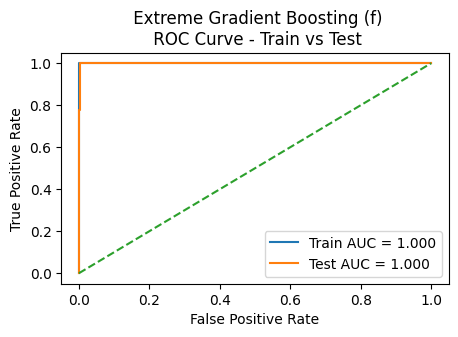

In [ ]:
#plot the roc auc curve
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Train probabilities
y_xgb_train_prob = xgb.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, y_xgb_train_prob)
auc_train = roc_auc_score(y_train, y_xgb_train_prob)

# Test probabilities
y_xgb_test_prob = xgb.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_xgb_test_prob)
auc_test = roc_auc_score(y_test, y_xgb_test_prob)

# Plot
plt.figure(figsize=(5,3))
plt.plot(fpr_train, tpr_train, label=f"Train AUC = {auc_train:.3f}")
plt.plot(fpr_test, tpr_test, label=f"Test AUC = {auc_test:.3f}")
plt.plot([0,1], [0,1], linestyle="--")


plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(" Extreme Gradient Boosting (f)\n ROC Curve - Train vs Test")
plt.legend()
plt.show()

###**Hyperparameter Tuning**

In [ ]:
#to see all the hyperparameter names and their current values in XGBoost
xgb.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': 'logloss',
 'feature_types': None,
 'feature_weights': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': np.float64(182.64285714285714),
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [ ]:
#define the param grid
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5],
    "learning_rate": [0.05, 0.1],
    "subsample": [0.8],
    "colsample_bytree": [0.8]
}



In [ ]:
#using the stratified k fold cross validation for imbalanced class

from sklearn.model_selection import StratifiedKFold, GridSearchCV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
#run the grid search and fit on train data with 5 fold
xgb_grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=cv,
    scoring='roc_auc', # Changed 'auc_roc' to 'roc_auc'
    n_jobs=-1,
    verbose=2
)

xgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8],
                         'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200], 'subsample': [0.8]},
             scoring='roc_auc', verbose=2)

In [ ]:
#to get the best hyper para combination
xgb_grid.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.05,
 'max_depth': 3,
 'n_estimators': 200,
 'subsample': 0.8}

In [ ]:
print(xgb_grid.best_score_)

0.9988271057566862


In [ ]:
# Assuming best_rf holds the dictionary of best parameters from xgb_grid.best_params_
# The original model `xgb` was defined with random_state and scale_pos_weight

# Reinitialize the Extreme gradient boosting model with the best parameters and original settings
best_xgb_model =  XGBClassifier(objective='binary:logistic', eval_metric='logloss', scale_pos_weight=spw, random_state=42, **xgb_grid.best_params_)

# Fit this new model to the training data
best_xgb_model.fit(X_train, y_train)

# Predict on train and test data using the newly fitted model
y_xgb_hyper_train_pred = best_xgb_model.predict(X_train)
y_xgb_hyper_test_pred = best_xgb_model.predict(X_test)
# for predict probabilities (auc roc score)
y_xgb_hyper_train_prob = best_xgb_model.predict_proba(X_train)[:, 1]
y_xgb_hyper_test_prob = best_xgb_model.predict_proba(X_test)[:, 1]

In [ ]:
xgb_hyper_train_f1 = f1_score(y_train, y_xgb_hyper_train_pred)
xgb_hyper_test_f1 = f1_score(y_test, y_xgb_hyper_test_pred)
xgb_hyper_train_precision = precision_score(y_train, y_xgb_hyper_train_pred)
xgb_hyper_test_precision = precision_score(y_test, y_xgb_hyper_test_pred)
xgb_hyper_train_recall = recall_score(y_train, y_xgb_hyper_train_pred)
xgb_hyper_test_recall = recall_score(y_test, y_xgb_hyper_test_pred)
xgb_hyper_train_accuracy = accuracy_score(y_train, y_xgb_hyper_train_pred)
xgb_hyper_test_accuracy = accuracy_score(y_test, y_xgb_hyper_test_pred)
xgb_hyper_train_confusion = confusion_matrix(y_train, y_xgb_hyper_train_pred, normalize='true')
xgb_hyper_test_confusion = confusion_matrix(y_test, y_xgb_hyper_test_pred, normalize='true')
xgb_hyper_train_auc = roc_auc_score(y_train, y_xgb_hyper_train_prob)
xgb_hyper_test_auc = roc_auc_score(y_test, y_xgb_hyper_test_prob)

In [ ]:
print('XGB hyper F1 (Train)        : ', xgb_hyper_train_f1)
print('XGB hyper Precision (Train) : ', xgb_hyper_train_precision)
print('XGB hyper Recall (Train)    : ', xgb_hyper_train_recall)
print('XGB hyper F1 (Test)         : ', xgb_hyper_test_f1)
print('XGB hyper Precision (Test)  : ', xgb_hyper_test_precision)
print('XGB hyper Recall (Test)     : ', xgb_hyper_test_recall)
print('XGB hyper Accuracy (Train)  : ', xgb_hyper_train_accuracy)
print('XGB hyper Accuracy (Test)   : ', xgb_hyper_test_accuracy)
print('XGB hyper Confusion (Train) : ', xgb_hyper_train_confusion)
print('XGB hyper Confusion (Test)  : ', xgb_hyper_test_confusion)
print('XGB hyper AUC (Train)       : ', xgb_hyper_train_auc)
print('XGB hyper AUC (Test)        : ', xgb_hyper_test_auc)

XGB hyper F1 (Train)        :  0.8235294117647058
XGB hyper Precision (Train) :  0.7
XGB hyper Recall (Train)    :  1.0
XGB hyper F1 (Test)         :  0.6206896551724138
XGB hyper Precision (Test)  :  0.45
XGB hyper Recall (Test)     :  1.0
XGB hyper Accuracy (Train)  :  0.9976662777129521
XGB hyper Accuracy (Test)   :  0.9935822637106184
XGB hyper Confusion (Train) :  [[0.9976535 0.0023465]
 [0.        1.       ]]
XGB hyper Confusion (Test)  :  [[0.99354839 0.00645161]
 [0.         1.        ]]
XGB hyper AUC (Train)       :  1.0
XGB hyper AUC (Test)        :  0.9997393287715868


In [ ]:
import pandas as pd
xgb_hyperpara_metrics_df = pd.DataFrame({
    'Method': ['Extreme Gradient Boosting Hyperpara(f)', 'Extreme Gradient Boosting Hyperpara(f)'],
    'Dataset': ['Train', 'Test'],
    'Precision': [xgb_hyper_train_precision, xgb_hyper_test_precision],
    'Recall': [xgb_hyper_train_recall, xgb_hyper_test_recall],
    'F1 Score': [xgb_hyper_train_f1, xgb_hyper_test_f1],
    'Accuracy': [xgb_hyper_train_accuracy, xgb_hyper_test_accuracy],
    'Confusion Matrix': [xgb_hyper_train_confusion, xgb_hyper_test_confusion],
    'AUC': [xgb_hyper_train_auc, xgb_hyper_test_auc]
})

xgb_hyperpara_metrics_df

,Method,Dataset,Precision,Recall,F1 Score,Accuracy,Confusion Matrix,AUC
0,Extreme Gradient Boosting Hyperpara(f),Train,0.70,1.0,0.823529,0.997666,"[[0.9976535001955417, 0.0023464998044583495], ...",1.000000
1,Extreme Gradient Boosting Hyperpara(f),Test,0.45,1.0,0.620690,0.993582,"[[0.9935483870967742, 0.0064516129032258064], ...",0.999739


In [ ]:
#raw result of confusion matrix
xgb_hyper_train_confusion_raw = confusion_matrix(y_train, y_xgb_hyper_train_pred)
xgb_hyper_test_confusion_raw = confusion_matrix(y_test, y_xgb_hyper_test_pred)

print('XGB hyper Confusion (Train) : ', xgb_hyper_train_confusion_raw)
print('XGB hyper Confusion (Test)  : ', xgb_hyper_test_confusion_raw)

XGB hyper Confusion (Train) :  [[2551    6]
 [   0   14]]
XGB hyper Confusion (Test)  :  [[1694   11]
 [   0    9]]


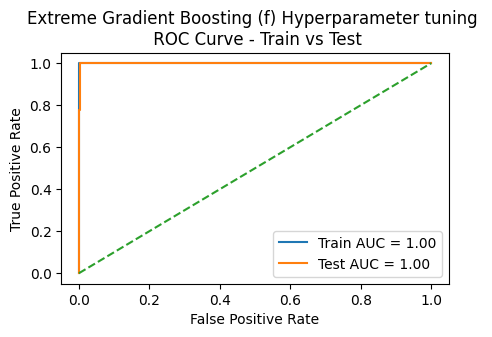

In [ ]:
#plot the roc auc curve
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Train probabilities
y_xgb_hyper_train_prob = xgb.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, y_xgb_hyper_train_prob)
auc_train = roc_auc_score(y_train, y_xgb_hyper_train_prob)

# Test probabilities
y_xgb_hyper_test_prob = xgb.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_xgb_hyper_test_prob)
auc_test = roc_auc_score(y_test, y_xgb_hyper_test_prob)

# Plot
plt.figure(figsize=(5,3))
plt.plot(fpr_train, tpr_train, label=f"Train AUC = {auc_train:.2f}")
plt.plot(fpr_test, tpr_test, label=f"Test AUC = {auc_test:.2f}")
plt.plot([0,1], [0,1], linestyle="--")


plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extreme Gradient Boosting (f) Hyperparameter tuning \n ROC Curve - Train vs Test")
plt.legend()
plt.show()

##**Final Comparision Table**

In [ ]:
import pandas as pd

final_fp_table = pd.concat([
    rf_metrics_df[rf_metrics_df["Dataset"] == "Test"].assign(Method="RF Default"),
    rf_hyperpara_metrics_df[rf_hyperpara_metrics_df["Dataset"] == "Test"].assign(Method="RF Tuned"),
    xgb_metrics_df[xgb_metrics_df["Dataset"] == "Test"].assign(Method="XGB Default"),
    xgb_hyperpara_metrics_df[xgb_hyperpara_metrics_df["Dataset"] == "Test"].assign(Method="XGB Tuned"),
    svc_metrics_df[svc_metrics_df["Dataset"] == "Test"].assign(Method="SVC Default"),
    svc_hyperpara_metrics_df[svc_hyperpara_metrics_df["Dataset"] == "Test"].assign(Method="SVC Tuned")
], ignore_index=True)

final_fp_table = final_fp_table[["Method", "Precision", "Recall", "F1 Score", "Accuracy", "AUC"]]

display(final_fp_table)

,Method,Precision,Recall,F1 Score,Accuracy,AUC
0,RF Default,0.888889,0.888889,0.888889,0.998833,0.999576
1,RF Tuned,0.450000,1.000000,0.620690,0.993582,0.999739
2,XGB Default,0.600000,1.000000,0.750000,0.996499,0.999544
3,XGB Tuned,0.450000,1.000000,0.620690,0.993582,0.999739
4,SVC Default,0.450000,1.000000,0.620690,0.993582,0.999479
5,SVC Tuned,0.750000,1.000000,0.857143,0.998250,0.999739


In [ ]:
final_fp_table = final_fp_table.round(3)
display(final_fp_table)


,Method,Precision,Recall,F1 Score,Accuracy,AUC
0,RF Default,0.889,0.889,0.889,0.999,1.000
1,RF Tuned,0.450,1.000,0.621,0.994,1.000
2,XGB Default,0.600,1.000,0.750,0.996,1.000
3,XGB Tuned,0.450,1.000,0.621,0.994,1.000
4,SVC Default,0.450,1.000,0.621,0.994,0.999
5,SVC Tuned,0.750,1.000,0.857,0.998,1.000
